In [1]:
import sklearn 
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from mpl_toolkits import mplot3d
from sklearn.metrics import pairwise_distances_argmin
#you can use Python’s imaging library (PIL)
from PIL import Image
from IPython.display import display
# or you can use opencv ## conda install anaconda::opencv
import cv2 #if you use cv2 remember to convert from BGR to RGB
import scipy.cluster.hierarchy as sch #you only for sch.dendrogram

## Generate Dataset (Default Seed)

In [2]:
#Generating synthetic data using make_blobs function. Seed is the default seed.
samples = 300
features = 2
k = 4
std = 0.6

X_default, y_default = make_blobs(n_samples = samples, n_features = features, centers = k, cluster_std = std, random_state = None)

## Generate Dataset (Seed = 2)

In [3]:
#Generating synthetic data using make_blobs function. Seed = 2.
samples = 300
features = 2
k = 4
std = 0.6
seed = 2

X_seed, y_seed = make_blobs(n_samples = samples, n_features = features, centers = k, cluster_std = std, random_state = seed)

## Plot the Generated Data with Labels

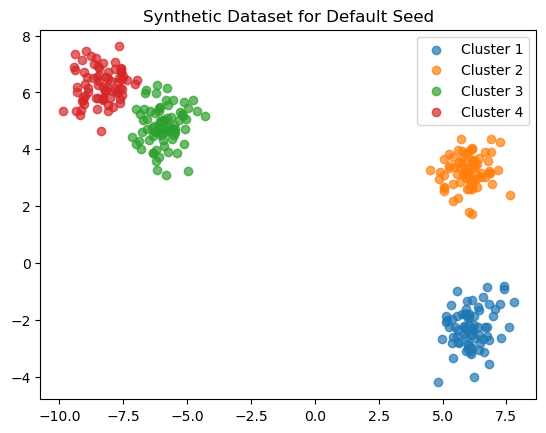

In [4]:
#Plotting the generated data (default seed)
clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

for i, cluster in enumerate(clusters):
    plt.scatter(X_default[y_default == i, 0], X_default[y_default == i, 1], label = cluster, alpha = 0.7)

plt.title("Synthetic Dataset for Default Seed")
plt.legend()
plt.show()

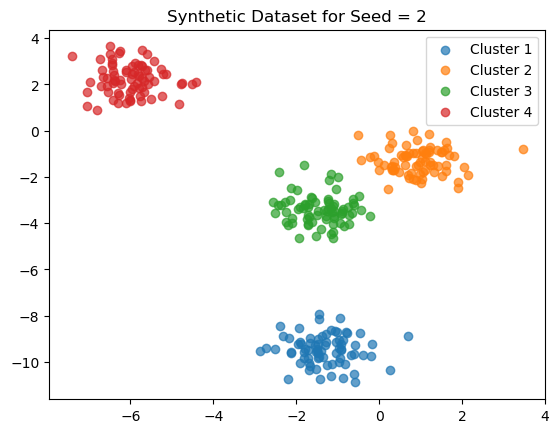

In [5]:
#Plotting generated data (seed = 2)
clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

for i, cluster in enumerate(clusters):
    plt.scatter(X_seed[y_seed == i, 0], X_seed[y_seed == i, 1], label = cluster, alpha = 0.7)

plt.title("Synthetic Dataset for Seed = 2")
plt.legend()
plt.show()

## K-means Implementation

In [6]:
def k_means(X, k, num_samples, max_iter):
    centroids = X[np.random.randint(num_samples, size=k)] #Randomly picking K points from the data without repetition as centroids of k clusters.
    point_labels = np.zeros(num_samples) #Initialize labels of the points
    
    for i in range(max_iter): #Running for max_inter iterations
        point_labels = pairwise_distances_argmin(X, centroids) #Calculating the closest centroid from the datapoint.
        new_centroids = np.zeros(centroids.shape)
        
        for cluster in range(k):
            new_centroids[cluster] = np.mean(X[point_labels == cluster], axis = 0) #Updating centroids of the cluster to be the mean of all points within the cluster.        

        centroids = new_centroids

    return centroids, point_labels #Return the centroids and the labels of the points.

## Fit the Model

In [7]:
#K-means clustering for default seed
centroids_default, point_labels_default = k_means(X = X_default, k = 4, num_samples = X_default.shape[0], max_iter = 5)

#K-means clustering for seed = 2
centroids_seed, point_labels_seed = k_means(X = X_seed, k = 4, num_samples = X_seed.shape[0], max_iter = 5)

## Plotting Figure

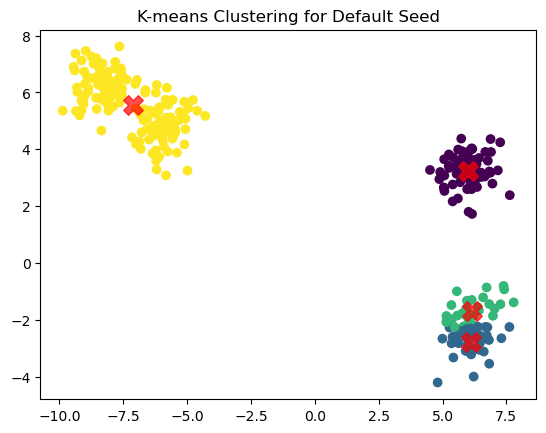

In [8]:
plt.scatter(X_default[:, 0], X_default[:, 1], c = point_labels_default)
plt.scatter(centroids_default[:,0], centroids_default[:,1], marker = 'X', c = 'Red', s = 200, alpha = 0.7)
plt.title("K-means Clustering for Default Seed")
plt.show()

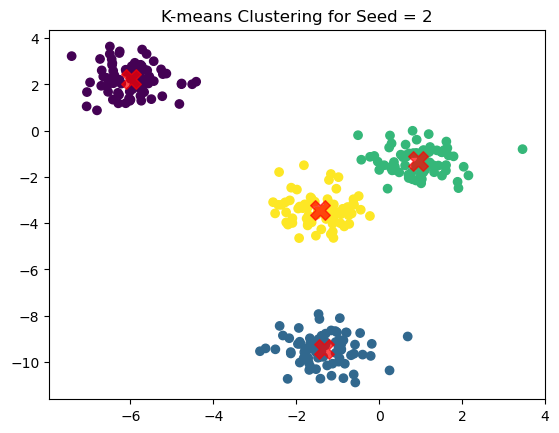

In [9]:
plt.scatter(X_seed[:,0], X_seed[:, 1], c = point_labels_seed)
plt.scatter(centroids_seed[:,0], centroids_seed[:,1], marker = 'X', c = 'Red', s = 200, alpha = 0.7)
plt.title("K-means Clustering for Seed = 2")
plt.show()

# K-means++ Implemenation

In [10]:
def squared_distance(x1, x2): #Squared distance formula
    return np.sum((x1-x2)**2)

def k_means_pp(X, k, num_samples, max_iter):
    centroids = X[np.random.choice(num_samples, size=1)] #Selecting one base centroid.
    
    for __ in range(1, k): #Calculating the remaining centroids
        squared_distances = []
        
        for i in range(num_samples):
            point = X[i, :]
            min_squared_distance = float('inf')
            
            for j in range(len(centroids)):
                min_squared_distance = min(min_squared_distance, squared_distance(point, centroids[j])) #Calculating the minimum squared distance from a point to the centroid.
            
            squared_distances.append(min_squared_distance) #Appending the minimum value
            
        squared_distances = np.array(squared_distances) #Transforming to np.arrary
        probs = squared_distances / np.sum(squared_distances) #Calculating the cumulative probabilities.
        centroids = np.vstack([centroids, X[np.random.choice(num_samples, size = 1, p = probs)]]) #Randomly picking the next centroid based on the cumulative probabilities.
        
    point_labels = np.zeros(num_samples)
    
    for i in range(max_iter):  #Running for max_inter iterations
        point_labels = pairwise_distances_argmin(X, centroids) #Calculating the closest centroid from the datapoint.
        new_centroids = np.zeros(centroids.shape)
        
        for cluster in range(k):
            new_centroids[cluster] = np.mean(X[point_labels == cluster], axis = 0) #Updating centroids of the cluster to be the mean of all points within the cluster.       

        centroids = new_centroids

    return centroids, point_labels

## Fit the Model (K-means++)

In [11]:
centroids_default_pp, point_labels_default_pp = k_means_pp(X_default, k = 4, num_samples = X_default.shape[0], max_iter = 5)

centroids_seed_pp, point_labels_seed_pp = k_means_pp(X_seed, k = 4, num_samples = X_seed.shape[0], max_iter = 5)

## Plotting Figure (K-means++)

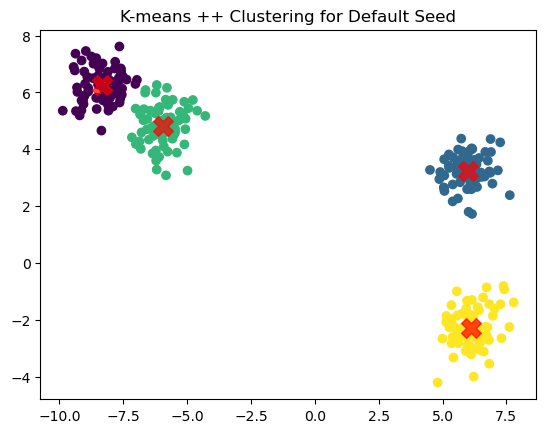

In [12]:
plt.scatter(X_default[:, 0], X_default[:, 1], c = point_labels_default_pp)
plt.scatter(centroids_default_pp[:,0], centroids_default_pp[:,1], marker = 'X', c = 'Red', s = 200, alpha = 0.7)
plt.title("K-means ++ Clustering for Default Seed")
plt.show()

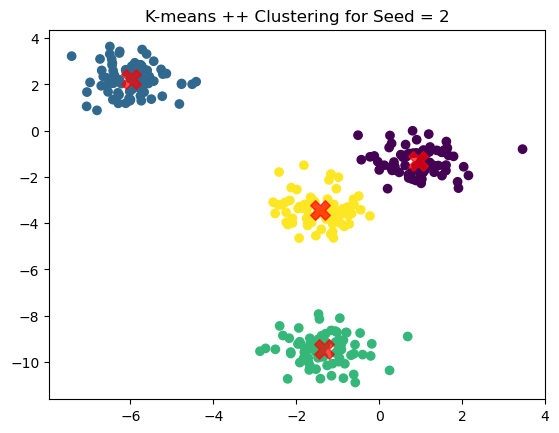

In [13]:
plt.scatter(X_seed[:, 0], X_seed[:, 1], c = point_labels_seed_pp)
plt.scatter(centroids_seed_pp[:,0], centroids_seed_pp[:,1], marker = 'X', c = 'Red', s = 200, alpha = 0.7)
plt.title("K-means ++ Clustering for Seed = 2")
plt.show()

For the default seed, k-means and k-means++ seem to perform well. It has classified clusters correctly. However, for seed = 2, we can see that cluster 2 and 3 are clustered as one cluster and cluster 4 is clustered into two separate clusters. This is not the case for k-means++, where it correctly clusters the points. The difference in k-means and k-means++ comes from the initialization of the initial centroids of the k clusters. For k-means, it is random, while k-means++ selects one base centroid and samples the other centroids based on the probability which is proportional to the distance from the nearest, previously chosen centroid. The better selection of initial centroids led to better peformance of k-means++ for seed = 2. 

## Load Image Dataset

In [14]:
image = Image.open('cropped.jpg') #Load image
image_rgb = image.convert('RGB') #Convert image to rgb
image_array = np.array(image_rgb) #Convert to numpy array

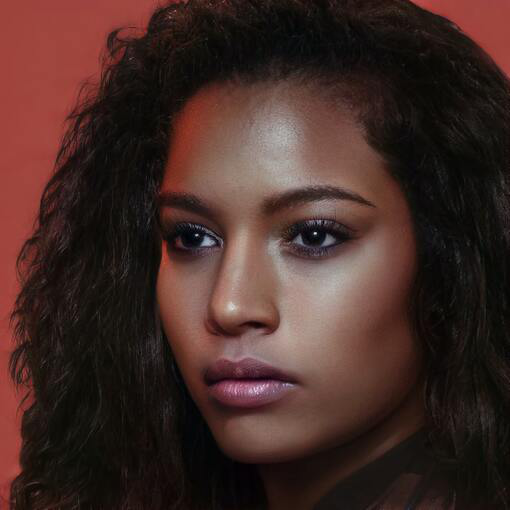

In [15]:
image

In [16]:
image_array.shape

(510, 510, 3)

In [17]:
#Flattening image data
image_array_flatten = image_array.reshape(image_array.shape[0]*image_array.shape[1], image_array.shape[2]) #Reshaping array into pixels x rgb

In [18]:
image_array_flatten.shape

(260100, 3)

## Plot Flattened Image Data

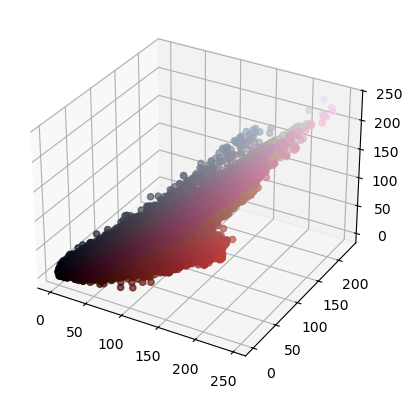

In [19]:
#Plotting 3d scatterplot the rgb of the image.
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
rgb = np.column_stack((image_array_flatten[:,0], image_array_flatten[:,1], image_array_flatten[:,2])) / 255.0 #Creating rgb values to color the points respectively.
ax.scatter(image_array_flatten[:,0], image_array_flatten[:,1], image_array_flatten[:,2], c = rgb, alpha = 0.7) #Using r, g, b as x, y z.
plt.show()

## Fit Model on Flattened Image Data Using K-means++

In [20]:
#Performing k-means++ on the rgb data of the image. Chose 8 different clusters.
image_centroids, image_labels = k_means_pp(image_array_flatten, k = 8, num_samples = image_array_flatten.shape[0], max_iter = 100)

## Plot Clustered Data

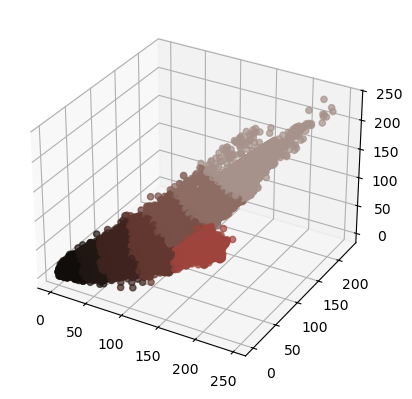

In [21]:
#Plotting 3d scatterplot of the clustered rgb data.
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
k_means_image = np.array([image_centroids[label] for label in image_labels]) / 255.0 #Creating image data by replacing labels with the centroid values of the labels.
ax.scatter(image_array_flatten[:,0], image_array_flatten[:,1], image_array_flatten[:,2], c = k_means_image, alpha = 0.7) #Using r, g, b as x, y, z. Using clustered image data to color the points respectively for better visualization.
plt.show()

In [22]:
#Reshaping the clustered image into its original shape.
k_means_image = k_means_image.reshape(510, 510, 3)

## Plot Clustered Data Back to Image

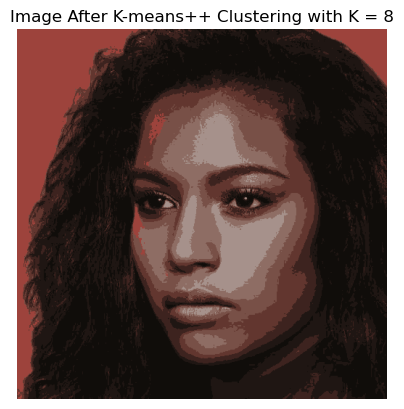

In [23]:
#Plotting the image.
plt.imshow(k_means_image)
plt.axis('off')
plt.title("Image After K-means++ Clustering with K = 8")
plt.show()

## Load Mall Customer Dataset

In [24]:
df = pd.read_csv('Mall_Customers.csv')
with pd.option_context('future.no_silent_downcasting', True):
    df["Gender"] = df["Gender"].replace(to_replace=['Male', 'Female'], value=[-1, 1]).infer_objects() 
df = df.drop('CustomerID', axis=1) 

In [25]:
X = np.array(df)
X

array([[ -1,  19,  15,  39],
       [ -1,  21,  15,  81],
       [  1,  20,  16,   6],
       [  1,  23,  16,  77],
       [  1,  31,  17,  40],
       [  1,  22,  17,  76],
       [  1,  35,  18,   6],
       [  1,  23,  18,  94],
       [ -1,  64,  19,   3],
       [  1,  30,  19,  72],
       [ -1,  67,  19,  14],
       [  1,  35,  19,  99],
       [  1,  58,  20,  15],
       [  1,  24,  20,  77],
       [ -1,  37,  20,  13],
       [ -1,  22,  20,  79],
       [  1,  35,  21,  35],
       [ -1,  20,  21,  66],
       [ -1,  52,  23,  29],
       [  1,  35,  23,  98],
       [ -1,  35,  24,  35],
       [ -1,  25,  24,  73],
       [  1,  46,  25,   5],
       [ -1,  31,  25,  73],
       [  1,  54,  28,  14],
       [ -1,  29,  28,  82],
       [  1,  45,  28,  32],
       [ -1,  35,  28,  61],
       [  1,  40,  29,  31],
       [  1,  23,  29,  87],
       [ -1,  60,  30,   4],
       [  1,  21,  30,  73],
       [ -1,  53,  33,   4],
       [ -1,  18,  33,  92],
       [  1,  

In [26]:
X.shape

(200, 4)

## Hierarchical Clustering Implementation

In [27]:
def ward_distance(X, clus1, clus2):
    clus1_mean = np.mean(X[clus1], axis = 0) #Calculating mean for cluster 1.
    clus2_mean = np.mean(X[clus2], axis = 0) #Calculating mean for cluster 2.

    n1 = len(clus1) #Length of cluster 1.
    n2 = len(clus2) #Length of cluster 2.

    return ((n1*n2) / (n1+n2)) * np.sum((clus1_mean - clus2_mean)**2) #Ward method formula.

def hierarchical_clustering(X):
    clusters = {i:[i] for i in range(len(X))} #Creating a dictionary of the clusters. i = cluster id, [] = cluster array
    merge_history = [] #The linkage matrix that stores the merging history.
    new_cluster_id = len(X) #Newly merged clusters will start from index 200.
    
    while len(clusters) > 1: #Continue merging until there is one cluster left.
        min_distance = float('inf')
        merge_pair = None
        
        for key1, value1 in clusters.items(): #Looping through all possible pairs
            for key2, value2 in clusters.items():
                if key1 != key2: #To prevent computation over the same cluster.
                    distance = ward_distance(X, value1, value2) #Calculating the ward distance of the two clusters.

                    if distance < min_distance: #If the distance is minimum, update min_distance and the pair ids to be merged.
                        min_distance = distance
                        merge_pair = (key1, key2) #Pair ids stored as a tuple.

        clus1_id, clus2_id = merge_pair #Getting cluster id.
        merge_clus = clusters[clus1_id] + clusters[clus2_id] #Merging the two clusters.
        clusters[new_cluster_id] = merge_clus #Storing the new merged cluster in the dictionary with a new key, which is the new id.
        new_cluster_id += 1 #Increment new cluster id.
        merge_history.append([clus1_id, clus2_id, min_distance, 0]) #Appending the merge history. Cluster 1 id, cluster 2 id, minimum distance, 0.

        #Deleting the clusters that have been merged.
        del clusters[clus1_id]
        del clusters[clus2_id]
        
    return merge_history
        

## Fit the Model (Hierarchical Clustering)

In [28]:
merge_history = hierarchical_clustering(X)

In [29]:
merge_history

[[65, 68, 0.5, 0],
 [129, 131, 0.5, 0],
 [3, 5, 1.5, 0],
 [48, 49, 2.0, 0],
 [100, 105, 2.5, 0],
 [114, 115, 2.5, 0],
 [147, 159, 3.0, 0],
 [106, 109, 4.0, 0],
 [92, 96, 4.5, 0],
 [117, 119, 4.5, 0],
 [156, 158, 4.5, 0],
 [101, 208, 4.833333333333333, 0],
 [60, 70, 5.0, 0],
 [133, 137, 5.0, 0],
 [13, 15, 6.0, 0],
 [50, 56, 6.0, 0],
 [83, 85, 6.0, 0],
 [16, 20, 6.5, 0],
 [112, 121, 6.5, 0],
 [84, 87, 7.0, 0],
 [150, 152, 7.0, 0],
 [181, 183, 7.0, 0],
 [110, 207, 7.333333333333333, 0],
 [11, 19, 8.5, 0],
 [75, 78, 8.5, 0],
 [95, 97, 8.5, 0],
 [43, 51, 9.0, 0],
 [62, 67, 9.0, 0],
 [79, 216, 9.333333333333332, 0],
 [99, 113, 9.5, 0],
 [135, 143, 9.5, 0],
 [74, 80, 10.0, 0],
 [139, 213, 10.333333333333332, 0],
 [64, 72, 10.5, 0],
 [123, 127, 10.5, 0],
 [130, 136, 10.5, 0],
 [141, 149, 11.0, 0],
 [54, 59, 11.5, 0],
 [167, 173, 11.5, 0],
 [89, 211, 11.666666666666657, 0],
 [170, 172, 12.5, 0],
 [187, 191, 12.5, 0],
 [154, 220, 13.0, 0],
 [26, 28, 13.5, 0],
 [61, 200, 13.5, 0],
 [103, 120, 13.

## Plot Dendrogram

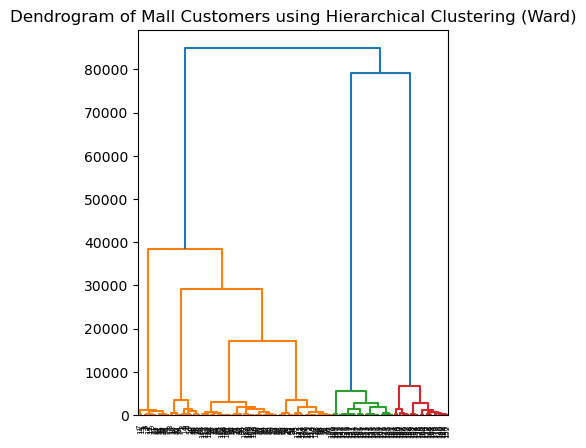

In [30]:
plt.figure(figsize=(4,5))
sch.dendrogram(merge_history) #Using dendrogram function from sch.
plt.title("Dendrogram of Mall Customers using Hierarchical Clustering (Ward)")
plt.show()